# Hotel Review Sentiment Analysis using  NLP Machine Learning

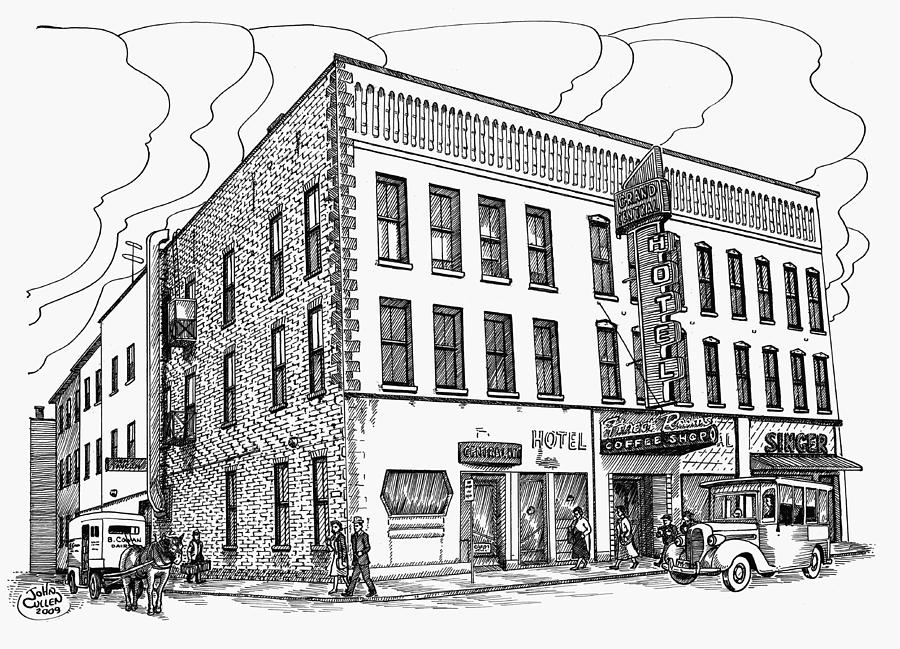

# Dataset link
## https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

In [1]:
# install the dependencies
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
hotel=pd.read_csv("C:\\Users\\Pranav\\Desktop\\DATA SCIENCE DATA\\CVC file\\tripadvisor_hotel_reviews.csv")

In [3]:
hotel.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# shape of dataset
hotel.shape

(20491, 2)

In [5]:
# information about dataset
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
# find ot null value in dataset
hotel.isnull().sum()

Review    0
Rating    0
dtype: int64

In [7]:
# index of dataset
hotel.index

RangeIndex(start=0, stop=20491, step=1)

## Cleaning the Data

In [10]:
hotel["Rating"].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [17]:
# Creating negative review dataframe
hotel_negative_review=hotel.loc[hotel["Rating"]<3]
hotel_negative_review=hotel_negative_review.reset_index(drop=True)

In [18]:
hotel_negative_review.head()

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2


In [23]:
# Creating positive review dataframe
hotel_positive_5star_review=hotel.loc[hotel["Rating"]==5]
hotel_positive_5star_review=hotel_positive_5star_review.reset_index(drop=True)

In [24]:
hotel_positive_5star_review.head()

,Review,Rating
0,"unique, great stay, wonderful time hotel monac...",5
1,"great stay great stay, went seahawk game aweso...",5
2,love monaco staff husband stayed hotel crazy w...,5
3,"cozy stay rainy city, husband spent 7 nights m...",5
4,"hotel stayed hotel monaco cruise, rooms genero...",5


In [25]:
# Lenght of postive 5 star review in Dataframe
print(len(hotel_positive_5star_review))

9054


In [22]:
# Lenght of negative review in Dataframe
print(len(hotel_negative_review))

3214


In [27]:
hotel_positive_review=hotel_positive_5star_review.loc[:len(hotel_negative_review)]

In [28]:
hotel_positive_review.head()

,Review,Rating
0,"unique, great stay, wonderful time hotel monac...",5
1,"great stay great stay, went seahawk game aweso...",5
2,love monaco staff husband stayed hotel crazy w...,5
3,"cozy stay rainy city, husband spent 7 nights m...",5
4,"hotel stayed hotel monaco cruise, rooms genero...",5


In [29]:
# Lenght of postive  review in Dataframe
print(len(hotel_positive_review))

3215


In [32]:
hotel_all=pd.concat([hotel_negative_review,hotel_positive_review],axis=0)
hotel_all=hotel_all.reset_index(drop=True)

In [33]:
hotel_all.head()

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2


In [34]:
len(hotel_all)

6429

## Create a Sentiments column

In [35]:
hotel_all["Sentiment"]=np.where(hotel_all["Rating"]==5,"Positive","Negative")

In [36]:
hotel_all

,Review,Rating,Sentiment
0,ok nothing special charge diamond member hilto...,2,Negative
1,"poor value stayed monaco seattle july, nice ho...",2,Negative
2,horrible customer service hotel stay february ...,1,Negative
3,disappointed say anticipating stay hotel monac...,2,Negative
4,great location need internally upgrade advanta...,2,Negative
...,...,...,...
6424,perfect hotel hotel does not really need glowi...,5,Positive
6425,perfect hotel small hotel comfortable perfect ...,5,Positive
6426,ordinary location extraordinary hotel know lov...,5,Positive
6427,"classy indulgence awesome experience, staff n'...",5,Positive


In [37]:
hotel_all=hotel_all.sample(frac=1)
hotel_all=hotel_all.reset_index(drop=True)

In [38]:
hotel_all

,Review,Rating,Sentiment
0,fairly good stayed 4 nights hotel clean staff ...,1,Negative
1,great value charming friendly native new yorke...,5,Positive
2,"loved, normally n't stay hotel big wonderful, ...",5,Positive
3,ruined romantic weekend planned romantic weeke...,1,Negative
4,5 star hotel 5 star city stayed hotel 4 nights...,5,Positive
...,...,...,...
6424,loved abbaye saint-germain stayed week 2007. p...,5,Positive
6425,checked night little spoiled disappointed da h...,2,Negative
6426,"loved inn queen anne really great stay, great ...",5,Positive
6427,"absolutely wonderful, wife loved place, couple...",5,Positive


## Split into test and train Data

In [41]:
X=hotel_all['Review']
y=hotel_all['Sentiment']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [43]:
print("shape of X_train= ",X_train.shape)
print("shape of X_test= ",X_test.shape)
print("shape of y_train= ",y_train.shape)
print("shape of y_test= ",y_test.shape)

shape of X_train=  (4821,)
shape of X_test=  (1608,)
shape of y_train=  (4821,)
shape of y_test=  (1608,)


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
v=CountVectorizer()

In [46]:
X_train_vec=v.fit_transform(X_train)
X_test_vec=v.transform(X_test)

## Use a Classfication mode

In [47]:
from sklearn import svm

In [49]:
clf_svm=svm.SVC(kernel="linear")
clf_svm.fit(X_train_vec,y_train)

SVC(kernel='linear')

##  Test Accuracy

In [50]:
clf_svm.score(X_test_vec,y_test)

0.9546019900497512

Test data Accuracy is 95%

In [51]:
from sklearn.metrics import f1_score

In [52]:
f1_score(y_test,clf_svm.predict(X_test_vec),average=None)

array([0.95468653, 0.95451713])

In [57]:
Review1=["unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay,  |  "]
Review_vec1=v.transform(Review1)
clf_svm.predict(Review_vec1)

array(['Positive'], dtype=object)

In [58]:
Review2=["stay clear, internet reservation friday rang hour later add thursday booking, thursday rang let know arriving late said no problem, arrive 10.30pm hear oh n't booking tonight, n't room, total apathy not concerned, says sorrys looks reservation book sorrys apathy, finally says bb door calls authority hangs says sorry times, incompetence management employees, completely soured trip, stay away,  "]
Review_vec2=v.transform(Review2)
clf_svm.predict(Review_vec2)

array(['Negative'], dtype=object)